# OTSU

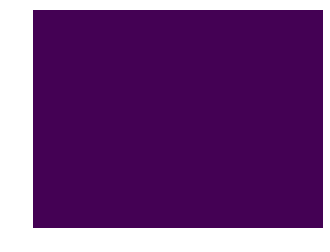

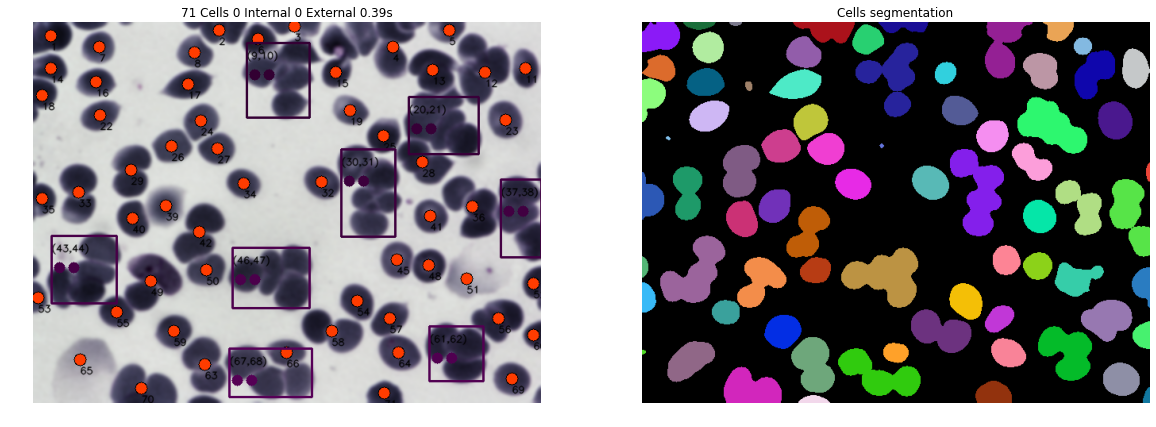

In [49]:
from ipynb.fs.full.general_functions import *
import ipynb.fs.full.methods_names as methods



def otsu_method(path, validation_type, blur=True, mark_parasites=True):
    """
    Returns: (img, cell_mask_colored), (cells, internal, external, passTime)
    """
    start = time.time()
    #read in grayscale
    imgGS = get_image(path=path)
    #read in colors
    img = get_image(path=path,mode=1)

    #apply blur
    name = "OTSU w/out blur"
    method_ext = methods.OTSU_OUT_BLUR
    if blur:
        name = "OTSU"
        method_ext = methods.OTSU
        imgGS = apply_blur(imgGS)
        img = apply_blur(img)
        
    
    
    #otsu adaptative
    cell_mask = otsu(imgGS)
    #cell_mask = unet.predict(img)
    
    
    #hsv mask
    par_mask, par_mask_dilated = hsv_par_mask(img)
    #GS mask
    #par_mask = gs_parasite_mask(imgGS)
    #plt.imshow(par_mask)
    #plt.show()
    
    #remove parasites from otsu
    cell_mask = remove_parasites(cell_mask,par_mask)

    
    #fill holes
    cell_mask = fill_holes(cell_mask)
    

    #break gorup of cells
    cell_mask = break_big_groups(cell_mask)
    
    
    #colorize the cells
    cell_mask_colored = colorize(cell_mask)
    

    #mark
    img, cells = mark_cells(img, cell_mask,validation_type=validation_type)
    if mark_parasites:
        img, internal, external = parasites_mark(img, par_mask, cell_mask)
    else:
        internal, external = 0,0
        
    end = time.time()


    passTime = "%.2fs" % (end-start)

    #save results
    save_results(path,name,cells,internal,external, passTime, img, method_ext, validation_type)
    
    return (img, cell_mask_colored), (cells, internal, external, passTime)


if __name__ == '__main__':
    #PATH = "../PHOTOS_MALARIA_VHIR_UPC/fotos_2015_12_01/P_falciparum/Trofozoits/DSCN0083.JPG"
    #PATH = "../blood_samples/samples/blood_smear_2.JPG"
    #PATH = "../blood_samples/samples/blood_smear_1.JPG"
    #PATH = "../blood_samples/samples/blood_smear_14.JPG"
    #PATH = '../blood_samples/samples/blood_smear_3.JPG'
    #PATH = '../blood_samples/samples/blood_smear_3.JPG'
    #PATH = '../blood_samples/samples/blood_smear_8.JPG'
    #PATH = '../verification-images/images/dec61ae1-5037-4c3a-8952-15371becca7d.png'
    PATH = '../verification-images/images/e3ea07d7-884a-412e-874a-40fd6b856736.png'
    images, stats = otsu_method(PATH, NO_VALIDATION)
    img, cell_mask = images
    cells, internal, external, passTime = stats 


    fig, ax = plt.subplots(ncols=2, figsize=(20, 20))
    ax[0].imshow(img)
    ax[0].set_title("%d Cells %d Internal %d External %s" %(cells,internal,external, passTime))
    ax[1].imshow(cell_mask, cmap='gray')
    ax[1].set_title("Cells segmentation")
    plt.show()

## OTSU without blur

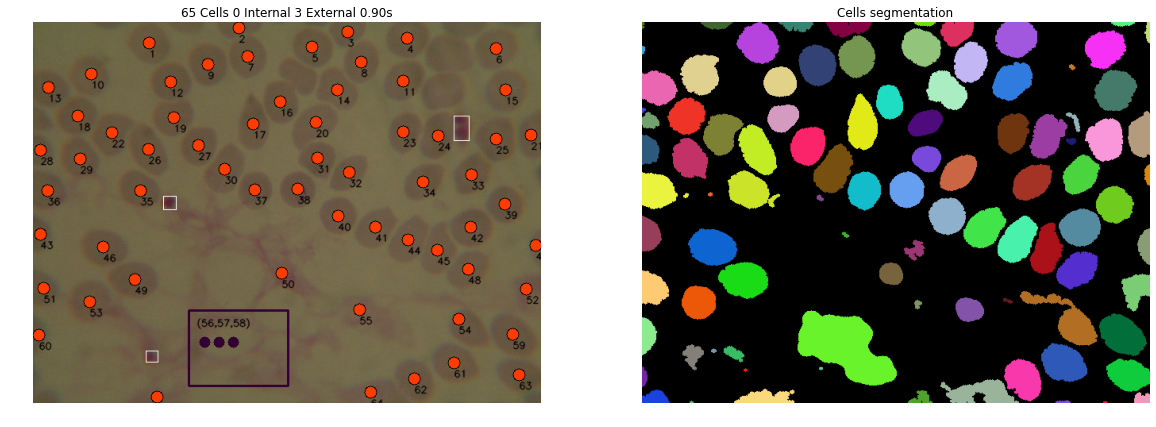

In [4]:
if __name__ == '__main__':

    images, stats = otsu_method(PATH, NO_VALIDATION, blur=False)
    img, cell_mask = images
    cells, internal, external, passTime = stats 

    fig, ax = plt.subplots(ncols=2, figsize=(20, 20))
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title("%d Cells %d Internal %d External %s" %(cells,internal,external, passTime))
    ax[1].imshow(cell_mask, cmap='gray')
    ax[1].set_title("Cells segmentation")
    plt.show()
